In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('./data/train.csv')

In [3]:
data_test = pd.read_csv('./data/test.csv')

## Просмотр данных

In [4]:
print(data_train.columns)
print(data_train.loc[0])
print(data_train.shape)

Index(['id', 'Количество.комнат', 'Студия', 'Общая.площадь', 'Этаж',
       'Этажей.в.доме', 'Парковка', 'Без.ремонта', 'Дизайнерский',
       'Евроремонт', 'Косметический', 'Балкон', 'Лоджия',
       'Совмещенный.санузел', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт',
       'Мусоропровод', 'Год.постройки', 'Аварийный',
       'Железобетонные.перекрытия', 'Смешанные.перекрытия',
       'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены',
       'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены',
       'Монолитные.стены', 'Смешанные.стены', 'Школа.1000', 'ВУЗ.1000',
       'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000',
       'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000',
       'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000',
       'Бар.1000', 'Банк.1000', 'Аптека.1000', 'Цена'],
      dtype='object')
id                              1122.0
Количество.комнат                  1.0
Студия                             0.0
О

In [5]:
print(data_test.columns)
print(data_test.loc[0])
print(data_test.shape)

Index(['id', 'Количество.комнат', 'Студия', 'Общая.площадь', 'Этаж',
       'Этажей.в.доме', 'Парковка', 'Без.ремонта', 'Дизайнерский',
       'Евроремонт', 'Косметический', 'Балкон', 'Лоджия',
       'Совмещенный.санузел', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт',
       'Мусоропровод', 'Год.постройки', 'Аварийный',
       'Железобетонные.перекрытия', 'Смешанные.перекрытия',
       'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены',
       'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены',
       'Монолитные.стены', 'Смешанные.стены', 'Школа.1000', 'ВУЗ.1000',
       'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000',
       'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000',
       'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000',
       'Бар.1000', 'Банк.1000', 'Аптека.1000'],
      dtype='object')
id                            747.0
Количество.комнат               1.0
Студия                          0.0
Общая.площадь     

In [6]:
print(data_train.isnull().sum().sum())
print(data_test.isnull().sum().sum())

0
0


In [7]:
for i in data_train.columns:
    uniq_values = data_train[i].unique()
    count_uniq_values = len(uniq_values)

    print(f'Значений в {i} = {count_uniq_values}:'
          f'{uniq_values[:8:]}')

Значений в id = 802:[1122 1369  901  379  162 1316  304  760]
Значений в Количество.комнат = 5:[1 2 3 4 5]
Значений в Студия = 2:[0 1]
Значений в Общая.площадь = 273:[33.6 32.  48.3 86.  18.  29.  35.5 35.8]
Значений в Этаж = 23:[5 2 7 1 3 8 4 6]
Значений в Этажей.в.доме = 24:[ 9  5 14 15 10 16 11  2]
Значений в Парковка = 2:[0 1]
Значений в Без.ремонта = 2:[0 1]
Значений в Дизайнерский = 2:[0 1]
Значений в Евроремонт = 2:[0 1]
Значений в Косметический = 2:[1 0]
Значений в Балкон = 5:[1 0 3 2 4]
Значений в Лоджия = 3:[0 1 2]
Значений в Совмещенный.санузел = 3:[1 0 2]
Значений в Раздельный.санузел = 3:[0 1 2]
Значений в Лифт = 4:[1 0 2 4]
Значений в Грузовой.лифт = 3:[0 1 2]
Значений в Мусоропровод = 2:[1 0]
Значений в Год.постройки = 76:[2013 1975 1984 1973 1977 1993 1989 2008]
Значений в Аварийный = 2:[0 1]
Значений в Железобетонные.перекрытия = 2:[1 0]
Значений в Смешанные.перекрытия = 2:[0 1]
Значений в Деревянные.перекрытия = 2:[0 1]
Значений в Иные.перекрытия = 2:[0 1]
Значений в 

## Проверка фиктивной переменной

In [8]:
categorical_repair = ['Без.ремонта', 'Дизайнерский', 'Евроремонт', 'Косметический']
categorical_overlap = ['Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Иные.перекрытия']
categorical_wall = ['Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Смешанные.стены']
categorical_list = [categorical_repair, categorical_overlap, categorical_wall]
some_possible_cetegorical = [['Балкон', 'Лоджия'], ['Совмещенный.санузел', 'Раздельный.санузел'], ['Лифт', 'Грузовой.лифт']]

In [9]:
for i in categorical_list:
    tmp_data = data_train[i].sum(axis=1)
    check_corr = tmp_data[tmp_data != 1]
    if len(check_corr) == 0:
        print(f'Ловушка фиктивной обнаружена')
    else:
        print(f'Ловушка фиктивной переменной  не обнаружена')

Ловушка фиктивной обнаружена
Ловушка фиктивной обнаружена
Ловушка фиктивной обнаружена


In [10]:
for i in some_possible_cetegorical:
    tmp_data = data_train[i].sum(axis=1)
    check_corr = tmp_data[tmp_data != 1]
    if len(check_corr) != 0:
        print(len(check_corr))
        print(f'Ловушка фиктивной переменной не обнаружена')
    else:
        print(f'Обнаружена ловушка фиктивной переменной')

329
Ловушка фиктивной переменной не обнаружена
132
Ловушка фиктивной переменной не обнаружена
469
Ловушка фиктивной переменной не обнаружена


In [11]:
# удаляем один из атрибутов для предотвращения мультиколлинеарности
data_train.drop(columns=['Без.ремонта', 'Иные.перекрытия', 'Смешанные.стены'], inplace=True)

In [12]:
print(data_train.loc[0])

id                              1122.0
Количество.комнат                  1.0
Студия                             0.0
Общая.площадь                     33.6
Этаж                               5.0
Этажей.в.доме                      9.0
Парковка                           0.0
Дизайнерский                       0.0
Евроремонт                         0.0
Косметический                      1.0
Балкон                             1.0
Лоджия                             0.0
Совмещенный.санузел                1.0
Раздельный.санузел                 0.0
Лифт                               1.0
Грузовой.лифт                      0.0
Мусоропровод                       1.0
Год.постройки                   2013.0
Аварийный                          0.0
Железобетонные.перекрытия          1.0
Смешанные.перекрытия               0.0
Деревянные.перекрытия              0.0
Панельные.стены                    1.0
Блочные.стены                      0.0
Деревянные.стены                   0.0
Кирпичные.стены          

## Построение тепловой карты и выявления признаков, которые слабо коллерируют с целевой переменной или сильно друг с другом

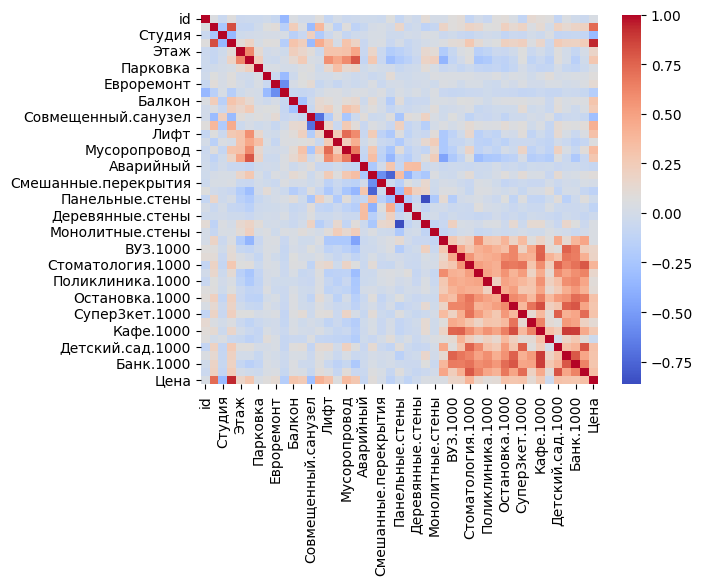

['id', 'Парковка', 'Смешанные.перекрытия', 'Панельные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Школа.1000', 'АЗС.1000']
[('Кирпичные.стены', 'Панельные.стены'), ('Бар.1000', 'Кафе.1000'), ('Банк.1000', 'Кафе.1000')]


In [13]:
corr_matrix = data_train.corr()

plt.figure()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

target = 'Цена'
low_corr_with_target = corr_matrix[target].drop(target).abs() < 0.05
low_corr_with_target = low_corr_with_target[low_corr_with_target].index.tolist()
print(low_corr_with_target)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            if feature_i != target and feature_j != target:
                high_corr_pairs.append((feature_i, feature_j))

print(high_corr_pairs)

In [14]:
all_features_set = set(low_corr_with_target)
for pair in high_corr_pairs:
    all_features_set |= set(pair)

all_features_set = list(all_features_set)
print(all_features_set)

['Парковка', 'Банк.1000', 'Панельные.стены', 'Кафе.1000', 'Смешанные.перекрытия', 'Кирпичные.стены', 'Школа.1000', 'Монолитные.стены', 'Деревянные.стены', 'Бар.1000', 'АЗС.1000', 'id']


In [15]:
data_train.drop(columns=all_features_set, inplace=True)
data_train.loc[0]

Количество.комнат                  1.0
Студия                             0.0
Общая.площадь                     33.6
Этаж                               5.0
Этажей.в.доме                      9.0
Дизайнерский                       0.0
Евроремонт                         0.0
Косметический                      1.0
Балкон                             1.0
Лоджия                             0.0
Совмещенный.санузел                1.0
Раздельный.санузел                 0.0
Лифт                               1.0
Грузовой.лифт                      0.0
Мусоропровод                       1.0
Год.постройки                   2013.0
Аварийный                          0.0
Железобетонные.перекрытия          1.0
Деревянные.перекрытия              0.0
Блочные.стены                      0.0
ВУЗ.1000                           2.0
ТЦ.1000                            2.0
Стоматология.1000                  8.0
Почта.1000                         0.0
Поликлиника.1000                   1.0
Парк.1000                

## Построение моделей

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, Ridge, ElasticNet, Lars, BayesianRidge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import clone
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrix
from scipy.stats import norm
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm




In [17]:
X = data_train.drop(columns=['Цена'])
Y = data_train['Цена']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.1, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # вперед
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # назад
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
            
    return included

In [19]:
selected_features = stepwise_selection(X_train, y_train, threshold_in=0.08)
print(selected_features)

['Общая.площадь', 'Стоматология.1000', 'Год.постройки', 'Евроремонт', 'Остановка.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Этаж', 'Одежда..1000', 'Косметический', 'Дизайнерский', 'Количество.комнат', 'Почта.1000', 'Супер3кет.1000']


In [20]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [21]:
# расчет RMSE
# расчет коэффициента детерминации
# расчет скорректированного коэффициеннта детерминации
def calculate_metrics(y_true, y_pred, n, p):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return {'RMSE': rmse, 'R2': r2, 'Adj R2': adj_r2}

def print_metrics(metrics, model_name):
    print(f"{model_name} metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

def calculate_aic_bic(y_true, y_pred, n_params):
    n = len(y_true)
    rss = np.sum((y_true - y_pred) ** 2)
    aic = n * np.log(rss / n) + 2 * n_params
    bic = n * np.log(rss / n) + n_params * np.log(n)
    return {'AIC': aic, 'BIC': bic}

### Линейная регрессия

In [22]:
n, p = X_test.shape
n_s, p_s = X_test_selected.shape

In [23]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_selected, y_train)

# подходит для линейных моделей, где зависимая переменная является линейной функцией независимых переменных
X_train_const = sm.add_constant(X_train_selected)
ols_model= sm.OLS(y_train, X_train_const).fit()

y_pred_linear = linear_regressor.predict(X_test_selected)

metrics_linear = calculate_metrics(y_test, y_pred_linear, n_s, p_s)
print_metrics(metrics_linear, "Линейная регрессия")

summary = ols_model.summary()
print(summary)


Линейная регрессия metrics:
RMSE: 329011.041056054
R2: 0.9129569907385185
Adj R2: 0.9046104008093354
                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     587.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:00:58   Log-Likelihood:                -8962.3
No. Observations:                 641   AIC:                         1.795e+04
Df Residuals:                     626   BIC:                         1.802e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Лассо Регрессия

In [24]:
lasso = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

best_lasso = lasso_regressor.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

metrics_lasso = calculate_metrics(y_test, y_pred_lasso, n, p)

print_metrics(metrics_lasso, "Лассо регрессия")

count_params = np.count_nonzero(best_lasso.coef_)
if best_lasso.intercept_ != 0:
    count_params += 1

aic_bic_lasso = calculate_aic_bic(y_test, y_pred_lasso, count_params)
print_metrics(aic_bic_lasso, "Лассо регрессия")

def statistics_with_cv(best_model, X_train, y_train):
    coef = best_model.coef_
    
    # расчет стандартных ошибок
    n = len(y_train)
    mse = np.mean((best_model.predict(X_train) - y_train) ** 2)
    XtX_inv = np.linalg.inv(np.dot(X_train.T, X_train))
    std_err = np.sqrt(np.diagonal(mse * XtX_inv))
    
    # t-статистика
    t_stats = coef / std_err
    
    # p-values 
    p_values = 2 * (1 - norm.cdf(np.abs(t_stats)))
    
    # доверительные интервалы
    confidence_intervals = np.array([coef - 1.96 * std_err, coef + 1.96 * std_err])
    
    column_names = list(X_train.columns)
    output = []
    for i, name in enumerate(column_names):
        output.append({
            "Feature": name,
            "Coefficient": coef[i],
            "Standard Error": std_err[i],
            "t-value": t_stats[i],
            "P-value": p_values[i],
            "95% CI Lower": confidence_intervals[0][i],
            "95% CI Upper": confidence_intervals[1][i]
        })
    
    results_df = pd.DataFrame(output)
    print(results_df)

statistics_with_cv(best_lasso, X_train, y_train)



Лассо регрессия metrics:
RMSE: 324270.00598948513
R2: 0.9154474886307424
Adj R2: 0.894309360788428
Лассо регрессия metrics:
AIC: 4151.964839454788
BIC: 4253.651183499275
                      Feature    Coefficient  Standard Error     t-value  \
0           Количество.комнат  -49723.902630    24393.945084   -2.038371   
1                      Студия  -54156.567412    53070.549365   -1.020464   
2               Общая.площадь   48624.608792     1401.502202   34.694636   
3                        Этаж    5314.979116     3851.071129    1.380130   
4               Этажей.в.доме    6572.926044     4341.150578    1.514098   
5                Дизайнерский  228745.837445    66373.754876    3.446330   
6                  Евроремонт  348810.874316    52349.689712    6.663093   
7               Косметический  141705.916397    38163.903328    3.713088   
8                      Балкон   33997.237803    22197.674746    1.531568   
9                      Лоджия   53480.750808    32640.485782    1.6384

### Гребневая регрессия

In [25]:
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
ridge_regressor.fit(X_train, y_train)

best_ridge = ridge_regressor.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

metrics_ridge = calculate_metrics(y_test, y_pred_ridge, n, p)
print_metrics(metrics_ridge, "Гребневая регрессия")

count_params = np.count_nonzero(best_ridge.coef_)
if best_ridge.intercept_ != 0:
    count_params += 1

aic_bic_ridge = calculate_aic_bic(y_test, y_pred_ridge, count_params)
print_metrics(aic_bic_ridge, "Гребневая регрессия")

statistics_with_cv(best_ridge, X_train, y_train)

Гребневая регрессия metrics:
RMSE: 322678.59682095476
R2: 0.9162753632863995
Adj R2: 0.8953442041079993
Гребневая регрессия metrics:
AIC: 4150.380680269294
BIC: 4252.067024313781
                      Feature    Coefficient  Standard Error     t-value  \
0           Количество.комнат  -44547.388964    24514.861569   -1.817158   
1                      Студия  -39513.655881    53333.610721   -0.740877   
2               Общая.площадь   48485.356769     1408.449201   34.424640   
3                        Этаж    5760.238729     3870.160210    1.488372   
4               Этажей.в.доме    6142.700086     4362.668896    1.408014   
5                Дизайнерский  117852.862937    66702.757877    1.766836   
6                  Евроремонт  238266.670144    52609.177895    4.528994   
7               Косметический   73316.064693    38353.075069    1.911609   
8                      Балкон   30734.527462    22307.704706    1.377754   
9                      Лоджия   51130.579349    32802.278915 

### Elastic-Net

In [26]:
elastic_net = ElasticNet()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}
elastic_net_regressor = GridSearchCV(elastic_net, parameters, cv=5, scoring='neg_mean_squared_error')
elastic_net_regressor.fit(X_train, y_train)

best_elastic_net = elastic_net_regressor.best_estimator_
y_pred_el = best_elastic_net.predict(X_test)

metrics_el = calculate_metrics(y_test, y_pred_el, n, p)
print_metrics(metrics_el, "ElasticNet Regression")

count_params = np.count_nonzero(best_elastic_net.coef_)
if best_elastic_net.intercept_ != 0:
    count_params += 1

aic_bic_elastic = calculate_aic_bic(y_test, y_pred_el, count_params)
print_metrics(aic_bic_elastic, "ElasticNet Regression")

statistics_with_cv(best_elastic_net, X_train, y_train)


ElasticNet Regression metrics:
RMSE: 322734.9919478611
R2: 0.9162460953140835
Adj R2: 0.8953076191426044
ElasticNet Regression metrics:
AIC: 4150.436951879394
BIC: 4252.123295923881
                      Feature    Coefficient  Standard Error     t-value  \
0           Количество.комнат  -46524.238732    24451.608506   -1.902707   
1                      Студия  -45158.737493    53195.999737   -0.848912   
2               Общая.площадь   48532.356669     1404.815131   34.547148   
3                        Этаж    5593.170146     3860.174451    1.448942   
4               Этажей.в.доме    6264.324530     4351.412370    1.439607   
5                Дизайнерский  151011.487089    66530.651919    2.269803   
6                  Евроремонт  274313.233005    52473.436086    5.227659   
7               Косметический   94786.879592    38254.116750    2.477822   
8                      Балкон   32117.991554    22250.146533    1.443496   
9                      Лоджия   52772.556322    32717.6427

### Метод наименьших углов

In [27]:
lasso_lars = LassoLars()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_lars_regressor = GridSearchCV(lasso_lars, parameters, cv=5, scoring='neg_mean_squared_error')
lasso_lars_regressor.fit(X_train, y_train)

best_lasso_lars = lasso_lars_regressor.best_estimator_
y_pred_lars = best_lasso_lars.predict(X_test)

metrics_lars = calculate_metrics(y_test, y_pred_lars, n, p)
print_metrics(metrics_lars, "Метод наименьших углов")

count_params = np.count_nonzero(best_lasso_lars.coef_)
if best_lasso_lars.intercept_ != 0:
    count_params += 1

aic_bic_lars = calculate_aic_bic(y_test, y_pred_el, count_params)
print_metrics(aic_bic_lars, "Метод наименьших углов")

statistics_with_cv(best_lasso_lars, X_train, y_train)

Метод наименьших углов metrics:
RMSE: 324270.2998680229
R2: 0.9154473353746336
Adj R2: 0.8943091692182921
Метод наименьших углов metrics:
AIC: 4150.436951879394
BIC: 4252.123295923881
                      Feature    Coefficient  Standard Error     t-value  \
0           Количество.комнат  -49725.211744    24393.945278   -2.038424   
1                      Студия  -54155.825945    53070.549786   -1.020450   
2               Общая.площадь   48624.676420     1401.502213   34.694684   
3                        Этаж    5315.069048     3851.071160    1.380153   
4               Этажей.в.доме    6572.861480     4341.150612    1.514083   
5                Дизайнерский  228744.122710    66373.755403    3.446304   
6                  Евроремонт  348809.569853    52349.690128    6.663068   
7               Косметический  141704.966133    38163.903631    3.713063   
8                      Балкон   33997.558424    22197.674922    1.531582   
9                      Лоджия   53481.421771    32640.48

### Байесовская регрессия

In [28]:
model = BayesianRidge()

param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_bayesian = grid_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test)
metrics_bayesian = calculate_metrics(y_test, y_pred_bayesian, n, p)
print_metrics(metrics_bayesian, "Bayesian Ridge")

count_params = np.count_nonzero(best_bayesian.coef_)
if best_bayesian.intercept_ != 0:
    count_params += 1

aic_bic_lars = calculate_aic_bic(y_test, y_pred_bayesian, count_params)
print_metrics(aic_bic_lars, "Bayesian Ridge")

def statistics_with_cv_bayesian(best_model, X_train, y_train):
    coef = best_model.coef_
    
    # извлечение ковариационной матрицы апостериорного распределения коэффициентов
    sigma = best_model.sigma_
    
    # расчет стандартных отклонений из ковариационной матрицы
    std_err = np.sqrt(np.diag(sigma))
    
    # доверительные интервалы для коэффициентов
    confidence_intervals = np.array([coef - 1.96 * std_err, coef + 1.96 * std_err])
    
    column_names = list(X_train.columns)
    output = []
    for i, name in enumerate(column_names):
        output.append({
            "Feature": name,
            "Coefficient": coef[i],
            "Standard Error": std_err[i],
            "95% CI Lower": confidence_intervals[0][i],
            "95% CI Upper": confidence_intervals[1][i]
        })
    
    results_df = pd.DataFrame(output)
    print(results_df)

statistics_with_cv_bayesian(best_bayesian, X_train, y_train)



Bayesian Ridge metrics:
RMSE: 330660.2713284482
R2: 0.9120821644034577
Adj R2: 0.8901027055043221
Bayesian Ridge metrics:
AIC: 4158.248655648154
BIC: 4259.934999692641
                      Feature   Coefficient  Standard Error  95% CI Lower  \
0           Количество.комнат -17199.720950    16371.300851 -49287.470618   
1                      Студия  -6777.692875    19695.513103 -45380.898558   
2               Общая.площадь  47788.214304     1024.233501  45780.716642   
3                        Этаж   7148.774356     3880.279351   -456.573171   
4               Этажей.в.доме   5168.386166     4726.870757  -4096.280518   
5                Дизайнерский   9176.827665    19936.443010 -29898.600634   
6                  Евроремонт  44028.523656    19027.270438   6735.073598   
7               Косметический  -5865.743958    17129.169414 -39438.916009   
8                      Балкон  11145.536929    15016.526461 -18286.854935   
9                      Лоджия  17457.175950    17555.834640 -1

### Обобщенная линейная регрессия

In [29]:
glm = sm.GLM(y_train, sm.add_constant(X_train_selected))
glm_results = glm.fit()
pred_glm = glm_results.predict(sm.add_constant(X_test_selected))

metrics_by = calculate_metrics(y_test, pred_glm, n_s, p_s)

print_metrics(metrics_by, "GlM Ridge")
print(glm_results.summary())

aic_bic_glm = calculate_aic_bic(y_test, pred_glm, len(glm_results.params))
print_metrics(aic_bic_glm, "GlM Ridge")

GlM Ridge metrics:
RMSE: 329011.0410560534
R2: 0.9129569907385189
Adj R2: 0.9046104008093357
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Цена   No. Observations:                  641
Model:                            GLM   Df Residuals:                      626
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                      8.3600e+10
Method:                          IRLS   Log-Likelihood:                -8962.3
Date:                Tue, 04 Jun 2024   Deviance:                   5.2334e+13
Time:                        02:01:17   Pearson chi2:                 5.23e+13
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

### Взвешенный МНК

In [30]:
weights = np.random.rand(len(y_train))
wls_model = sm.WLS(y_train, sm.add_constant(X_train_selected), weights=weights)
wls_results = wls_model.fit()
y_pred = wls_results.predict(sm.add_constant(X_test_selected))

metrics_mnk = calculate_metrics(y_test, y_pred, n_s, p_s)

print_metrics(metrics_mnk, "Взвешенный МНК")
print(wls_results.summary())


Взвешенный МНК metrics:
RMSE: 334711.7365198758
R2: 0.9099145122553002
Adj R2: 0.9012761778140276
                            WLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.930
Model:                            WLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     591.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:01:17   Log-Likelihood:                -9043.2
No. Observations:                 641   AIC:                         1.812e+04
Df Residuals:                     626   BIC:                         1.818e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Полиномиальная регрессия

In [31]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_selected)
X_poly_test = poly.transform(X_test_selected)

X_poly_train_with_const = sm.add_constant(X_poly_train)
X_poly_test_with_const = sm.add_constant(X_poly_test)

model = sm.OLS(y_train, X_poly_train_with_const)
results = model.fit()

y_pred = results.predict(X_poly_test_with_const)

metrics_poly = calculate_metrics(y_test, y_pred, n_s, p_s)
print_metrics(metrics_poly, "Полиномиальная регрессия")

print(results.summary())



Полиномиальная регрессия metrics:
RMSE: 316752.37216136476
R2: 0.9193224494131937
Adj R2: 0.9115862459322671
                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     88.89
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.54e-282
Time:                        02:01:18   Log-Likelihood:                -8850.2
No. Observations:                 641   AIC:                         1.793e+04
Df Residuals:                     527   BIC:                         1.844e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Сплайны

In [32]:
# создание сплайнов для тренировочных данных
splines_train = dmatrix("bs(x, df=6, degree=3, include_intercept=False)",
                        {"x": X_train_selected.iloc[:, 0]}, return_type='dataframe')

# подгонка модели OLS с использованием сплайнов
splines_model = sm.OLS(y_train, splines_train).fit()

# создание сплайнов для тестовых данных
splines_test = dmatrix("bs(x, df=6, degree=3, include_intercept=False)",
                       {"x": X_test_selected.iloc[:, 0]}, return_type='dataframe')

# прогнозирование
y_pred_splines = splines_model.predict(splines_test)

metrics_spline = calculate_metrics(y_test, y_pred_splines, n_s, p_s)

print_metrics(metrics_spline, "Spline Ridge")
print(splines_model.summary())

Spline Ridge metrics:
RMSE: 430703.7181781879
R2: 0.8508338796874493
Adj R2: 0.8365302791095335
                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     809.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.48e-293
Time:                        02:01:18   Log-Likelihood:                -9119.4
No. Observations:                 641   AIC:                         1.825e+04
Df Residuals:                     634   BIC:                         1.828e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.9

### Непараметрическая регрессия

In [33]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

kr = KernelRidge()

kr_regressor = GridSearchCV(kr, param_grid, cv=5, scoring='neg_mean_squared_error')
kr_regressor.fit(X_train, y_train)

best_kr = kr_regressor.best_estimator_
y_pred_kr = best_kr.predict(X_test)

metrics_spline = calculate_metrics(y_test, y_pred_kr, n, p)

print_metrics(metrics_spline, "Kernel Ridge")

Kernel Ridge metrics:
RMSE: 321829.3210806939
R2: 0.9167155023630076
Adj R2: 0.8958943779537595


## Predict

In [36]:
data_test.drop(columns=['Без.ремонта', 'Иные.перекрытия', 'Смешанные.стены'], inplace=True)
print(all_features_set)
data_X = data_test.drop(columns=all_features_set)

['Парковка', 'Банк.1000', 'Панельные.стены', 'Кафе.1000', 'Смешанные.перекрытия', 'Кирпичные.стены', 'Школа.1000', 'Монолитные.стены', 'Деревянные.стены', 'Бар.1000', 'АЗС.1000', 'id']


In [ ]:
predictions = linear_regressor.predict(data_X)

submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': predictions
})

submission.to_csv('predictioncs.csv', index=False)

In [ ]:
predictions = best_ridge.predict(data_X)

submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': predictions
})

submission.to_csv('predictioncs2.csv', index=False)

In [ ]:
predictions = bayesian_ridge.predict(data_X)

submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': predictions
})

submission.to_csv('predictioncs3.csv', index=False)

In [ ]:
X_poly_test = poly.transform(data_X[selected_features])
predictions = lin_reg.predict(X_poly_test)

submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': predictions
})

submission.to_csv('predictioncs4.csv', index=False)